In [1]:
import warnings
import numpy as np
from scipy.optimize import fsolve
from numpy.linalg import eigvals
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
warnings.filterwarnings('ignore') 
plt.rcParams["figure.figsize"] = (10,4)

# **5.3 Love Affairs**


<span style="color:red">**5.3.1 (Name-calling)**
<span style="color:red">Suggest names for the four romantic styles, determined by the signs of $a$ and $b$ in

<span style="color:red">$$
\dot{R} = aR + bJ.
$$

Equation (single Romeo equation shown in the exercise): $\dot R = aR + bJ$.
Interpretation by signs (compact):

* $a>0$: self–reinforcing; $a<0$: self–damping.
* $b>0$: responds positively to partner; $b<0$: responds negatively.

Suggested names (one per sign quadrant):

1. $a>0,b>0$: **Eager Lovers** (self–amplifying and responsive).
2. $a>0,b<0$: **Self–Centered Repulsors** (strong self but repelled).
3. $a<0,b>0$: **Anxious Admirers** (reactive but self–doubting).
4. $a<0,b<0$: **Withdrawn Antagonists** (damped and hostile).

(That matches the intuitive mapping of signs to psychological styles.)

<span style="color:red">**5.3.2**
Consider the affair described by

<span style="color:red">$$
\dot{R} = J, \quad \dot{J} = -R + J.
$$

<span style="color:red">a) Characterize the romantic styles of Romeo and Juliet.

<span style="color:red">b) Classify the fixed point at the origin. What does this imply for the affair?

<span style="color:red">c) Sketch $R(t)$ and $J(t)$ as functions of $t$, assuming $R(0) = 1$, $J(0) = 0$.



System :

$\quad \begin{aligned}\dot R &= J,\\ \dot J &= -R + J. \end{aligned} $

Matrix form $\dot{\mathbf x}=A\mathbf x$ with

$\quad A=\begin{pmatrix}0&1\\-1&1\end{pmatrix}.$

**Eigenvalues:** 

$\quad\det(A-\lambda I)=0$

$\quad\begin{vmatrix}-\lambda & 1\\-1 & 1-\lambda\end{vmatrix}=\lambda^2-\lambda+1=0.$

Roots :

$\quad\lambda=\frac{1\pm i\sqrt3}{2}=\frac{1}{2}\pm i\frac{\sqrt3}{2}.$

Real part $=\tfrac12>0$ so the origin is an **unstable spiral (spiral source)**.

**Implications / romantic styles:**

* Romeo: $\dot R=J$ → Romeo completely driven by Juliet (reactive).
* Juliet: $\dot J=-R+J$ → Juliet has self–reinforcement ($+J$) but is inhibited by Romeo ($-R$).                                                                
  Combined: oscillatory growth of feelings (spiraling away from origin).

**Explicit solution for $R(0)=1,\;J(0)=0$.**                                                                                                                        
Second–order for $R$: $R''-R'+R=0$ with roots $\tfrac{1\pm i\sqrt3}{2}$. 

Thus $\quad R(t)=e^{t/2}\Big(C\cos\frac{\sqrt3 t}{2}+D\sin\frac{\sqrt3 t}{2}\Big).$

Using $R(0)=1$ and $R'(0)=J(0)=0$ gives $C=1,\;D=-1/\sqrt3$. 

So $\quad\boxed{R(t)=e^{t/2}\!\left(\cos\frac{\sqrt3 t}{2}-\frac{1}{\sqrt3}\sin\frac{\sqrt3 t}{2}\right).}$

Since $J(t)=R'(t)$,

$\qquad\boxed{J(t)=-\frac{2}{\sqrt3}\,e^{t/2}\sin\!\left(\frac{\sqrt3 t}{2}\right).}$

Both functions oscillate with frequency $\omega=\tfrac{\sqrt3}{2}$ and amplitude envelope $e^{t/2}$ (growing oscillations).

In [2]:
def plot_system(A, x0, t_span=(0,20), title=""):
    
    # Define system
    def f(t, z):
        return A.dot(z)
    
    # Phase portrait field
    x = np.linspace(-3,3,25)
    y = np.linspace(-3,3,25)
    X, Y = np.meshgrid(x,y)
    U = A[0,0]*X + A[0,1]*Y
    V = A[1,0]*X + A[1,1]*Y
    N = np.sqrt(U**2+V**2)

    # Integrate trajectory
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    sol = solve_ivp(f, [t_span[0], t_span[1]], x0, t_eval=t_eval, max_step=0.05)
    R, J = sol.y
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    
    # Phase portrait
    ax = axes[0]
    ax.quiver(X, Y, U/N, V/N, N, angles='xy')
    ax.plot(R, J, 'k-', lw=2)
    ax.scatter([x0[0]], [x0[1]], c='r', marker='o')
    ax.axhline(0, color='k', lw=0.5); ax.axvline(0, color='k', lw=0.5)
    ax.set_xlim(-3,3); ax.set_ylim(-3,3)
    ax.set_xlabel('R'); ax.set_ylabel('J')
    ax.set_title("\nPhase field + trajectory")
    ax.grid(True, linestyle='--')

    # Time series
    ax = axes[1]
    ax.plot(sol.t, R, 'r-',  label='R (Romeo)')
    ax.plot(sol.t, J, 'g--', label='J (Juliet)')
    ax.set_xlabel('t'); ax.set_ylabel('feelings')
    ax.set_title("\nTime series")
    ax.legend(); ax.grid(True, linestyle='--')
    
    plt.tight_layout()
    fig.suptitle(title)
    plt.show()

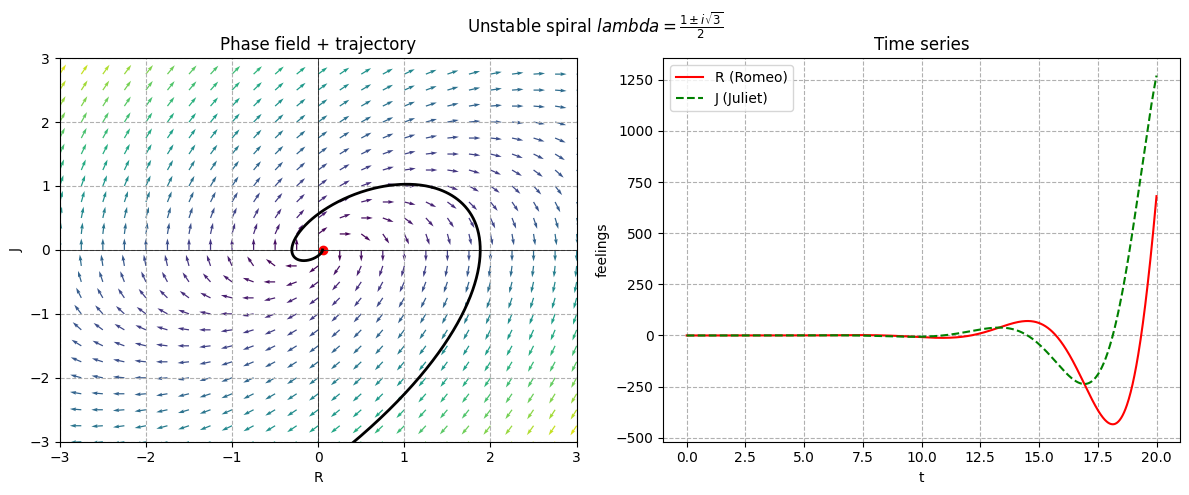

In [16]:
A1 = np.array([[ 0,1],
               [-1,1]])

plot_system(A1, x0=[0.05,0.0], t_span=(0,20), title=r"Unstable spiral $lambda=\frac{1\pm i\sqrt{3}}{2}$")


<span style="color:red">**5.3.3 (Out of touch with their own feelings)**
Suppose Romeo and Juliet react to each other, but not to themselves:

<span style="color:red">$$
\dot{R} = aJ, \quad \dot{J} = bR.
$$

<span style="color:red">What happens?


System :

$\quad\begin{aligned} \dot R &= aJ,\\ \dot J &= bR. \end{aligned}$

Matrix 

$\quad A=\begin{pmatrix}0&a\\ b&0\end{pmatrix}$.

Characteristic polynomial:

$\quad \det\begin{pmatrix}-\lambda & a\\ b & -\lambda\end{pmatrix}=\lambda^2-ab=0.$

Eigenvalues $\lambda=\pm\sqrt{ab}$.

* If $ab>0$: $\lambda$ real, opposite signs $\Rightarrow$ **saddle** (unstable). One mode grows exponentially, the other decays.

  * In particular $a>0,b>0$ gives mutual positive feedback → instability (runaway).
* If $ab<0$: $\lambda=\pm i\sqrt{|ab|}$ (pure imaginary) $\Rightarrow$ **center** (neutral, periodic oscillations). They exchange feelings back and forth indefinitely.
* If $ab=0$: degenerate (one coupling zero), reduces to simple exponential or linear behavior.


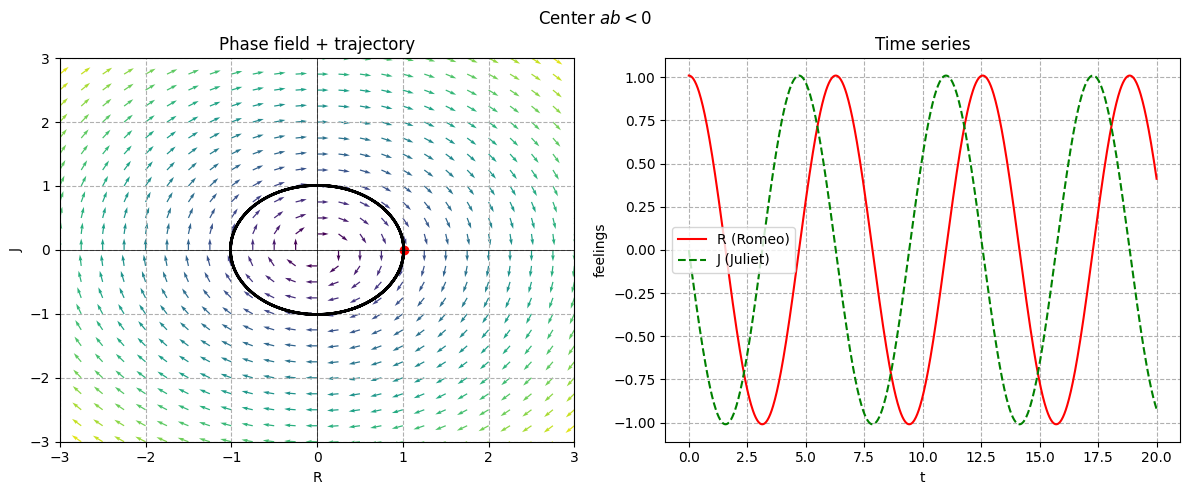

In [19]:
A2_center = np.array([[ 0,1],
                      [-1,0]])
plot_system(A2_center, x0=[1.01,0], t_span=(0,20), title=r"Center $ab<0$")

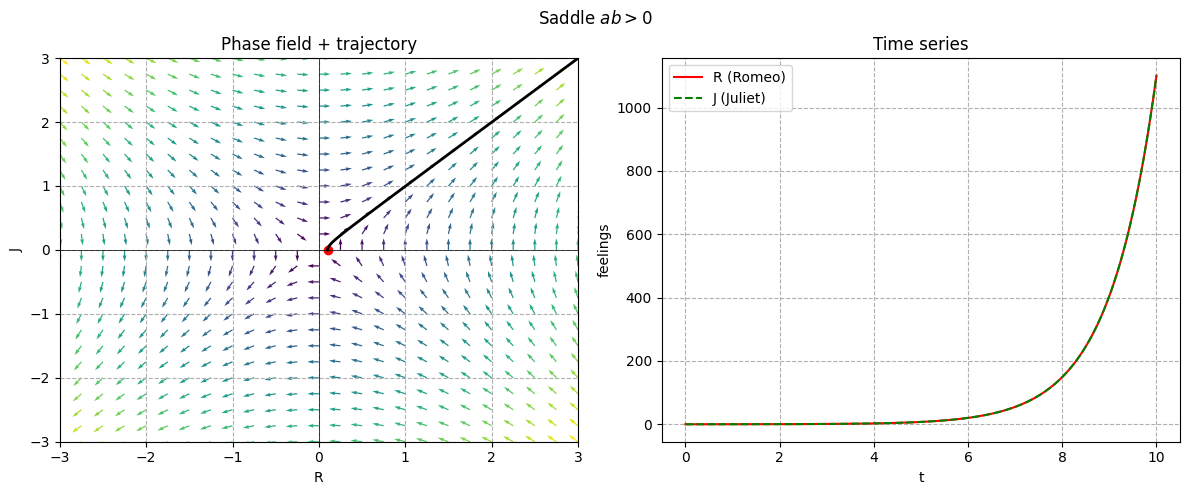

In [23]:
A3_saddle = np.array([[0,1],
                      [1,0]])
plot_system(A3_saddle, x0=[0.1,0.0], t_span=(0,10), title=r"Saddle $ab>0$")

<span style="color:red">**5.3.4 (Fire and water)**
Do opposites attract? Analyze

<span style="color:red">$$
\dot{R} = aR + bJ, \quad \dot{J} = -bR - aJ.
$$

System:

$\quad\begin{aligned} \dot R &= aR + bJ, \\ \dot J &= -bR - aJ. \end{aligned}$

Matrix 

$\quad A=\begin{pmatrix}a&b\\-b&-a\end{pmatrix}$.                                                                                                                    
$\quad\begin{aligned} \operatorname{tr}A &=a+(-a)=0,\\ \det A &= -(a^2+b^2).\end{aligned}$

Because $\det A = -(a^2+b^2)<0$ for $(a,b)\neq(0,0)$, eigenvalues are real and of opposite sign $\Rightarrow$ **saddle** (unstable) for any nonzero $(a,b)$.

**Conclusion:** this linear model yields a saddle — no stable mutual attraction in this setup.

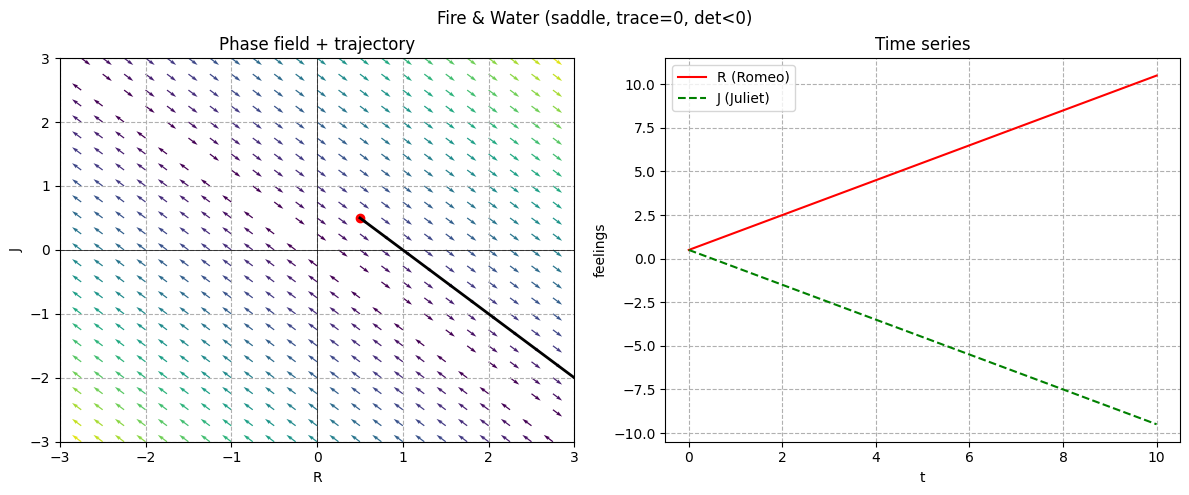

In [6]:
A4 = np.array([[ 1, 1],
               [-1,-1]])
plot_system(A4, x0=[0.5,0.5], t_span=(0,10), title="Fire & Water (saddle, trace=0, det<0)")

<span style="color:red">**5.3.5 (Peas in a pod)**
If Romeo and Juliet are romantic clones:

<span style="color:red">$$
\dot{R} = aR + bJ, \quad \dot{J} = bR + aJ,
$$

<span style="color:red">should they expect boredom or bliss?


System (symmetric clones):

$\quad \begin{aligned}\dot R &= aR + bJ,\\ \dot J &= bR + aJ. \end{aligned}$

Matrix 

$\quad A=\begin{pmatrix}a&b\\ b&a\end{pmatrix}$. 

$\therefore \; \det(A-\lambda I)=0$:

$\quad \begin{vmatrix}a-\lambda & b\\ b & a-\lambda\end{vmatrix}=(a-\lambda)^2-b^2=0$

$\Rightarrow$ $(a-\lambda)=\pm b$ so eigenvalues

$\quad\boxed{\lambda_1=a+b,\qquad \lambda_2=a-b.}$

Eigenvectors: $v_1=[1,1]^T$ (symmetric), $v_2=[1,-1]^T$ (antisymmetric).

Classification by signs of $\lambda_1,\lambda_2$:

* **Both negative** ($a+b<0$ and $a-b<0$ ⇔ $a<-|b|$) ⇒ both modes decay ⇒ **stable node** (both feelings die to 0 — boredom).
* **Both positive** ($a>|b|$ and $a+b>0$ ⇔ $a>|b|$) ⇒ both modes grow ⇒ **unstable node** (runaway “bliss”/explosion).
* **Opposite signs** ($(a+b)(a-b)<0$ ⇔ $|a|<|b|$ with sign patterns) ⇒ **saddle** (one mode grows, one decays → imbalance).
* **Degenerate** when $b=0$ or $a=\pm b$ (double eigenvalue / repeated root) — check Jordan form for details.


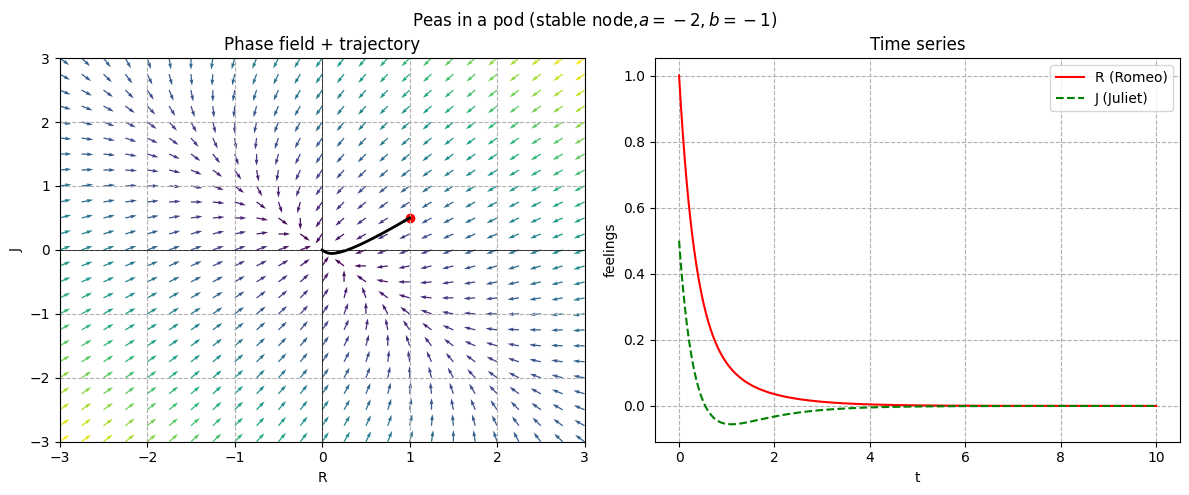

In [28]:
A5_stable = np.array([[-2,-1],
                      [-1,-2]])
plot_system(A5_stable, x0=[1,0.5], t_span=(0,10), title=r"Peas in a pod (stable node,$ a=-2,b=-1$)")

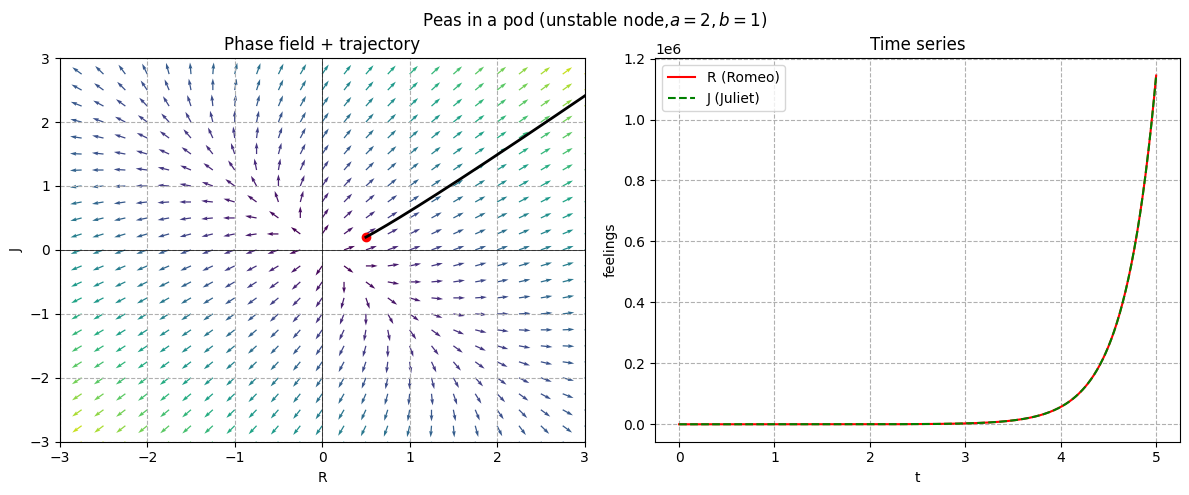

In [8]:
A6_unstable = np.array([[2,1],
                        [1,2]])
plot_system(A6_unstable, x0=[0.5,0.2], t_span=(0,5), title=r"Peas in a pod (unstable node,$ a=2,b=1$)")

<span style="color:red">**5.3.6 (Romeo the robot)**
Nothing could ever change the way Romeo feels about Juliet:

<span style="color:red">$$
\dot{R} = 0, \quad \dot{J} = aR + bJ.
$$

<span style="color:red">Does Juliet end up loving him or hating him?


System :

$\quad \begin{aligned}\dot R&=0,\\ \dot J &= aR + bJ.\end{aligned}$

So $R(t)=R_0$ constant.                                                                                                                                                   
Juliet’s linear ODE (inhomogeneous):

$\quad \dot J - bJ = aR_0.$

**Solution (case $b\neq0$)**:

$\quad\displaystyle J(t)=\frac{aR_0}{b}+\Big(J_0-\frac{aR_0}{b}\Big)e^{bt}.$

**If $b=0$ :** $J(t)=J_0+aR_0 t$.

**Long-time behavior:**

* If $b<0$ (Juliet self–damps): $J(t)\to \dfrac{aR_0}{b}$ as $t\to\infty$. Sign of $aR_0/b$ decides love (>0) or hate (<0).
* If $b>0$ (Juliet self–amplifies): exponential divergence (unstable) unless initial condition exactly cancels the growth term ($J_0=aR_0/b$).
* If $b=0$: linear growth/decline $J(t)=J_0+aR_0 t$.

**Interpretation:**                                                                                                                                                   
Romeo constant forcing; Juliet’s final attitude depends on sign and magnitude of $aR_0$ and whether her self–response $b$ is stabilizing ($b<0$) or destabilizing ($b>0$).



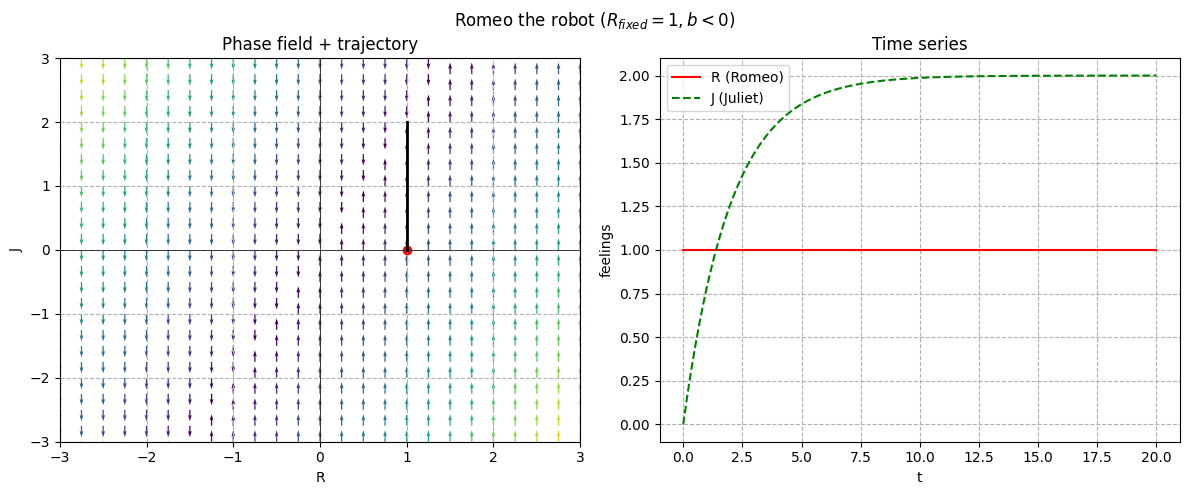

In [33]:
A7 = np.array([[0, 0.0],
               [1,-0.5]])
plot_system(A7, x0=[1,0], t_span=(0,20), title=r"Romeo the robot ($R_{fixed}=1, b<0$)")


### <span style="color:red">**7.2.19 (Modeling the love story in *Gone with the Wind*)**

<span style="color:red">**Rinaldi et al. (2013)** have modeled the stormy love affair between Scarlett O’Hara and Rhett Butler with the system:

<span style="color:red">$$
\dot{R} = -R + A_S + k S e^{-S}, 
$$

<span style="color:red">$$
\dot{S} = -S + A_R + k R e^{-R}.
$$

<span style="color:red">Here $R$ denotes **Rhett’s love for Scarlett**, and $S$ denotes **Scarlett’s love for Rhett**.                                                               
<span style="color:red">The parameters $A_{\tiny R}, A_{\tiny S},$ and $k$ are all positive.


<span style="color:red">**a)** Interpret the three terms on the right-hand side of each equation. What do they mean, romantically speaking?                                             
<span style="color:red">In particular, what does the functional form of the third terms, $k S e^{-S}$ and $k R e^{-R}$, signify about how Rhett and Scarlett react to each other’s endearments?

<span style="color:red">**b)** Show that all trajectories that begin in the first quadrant $R,S \geq 0$ stay in the first quadrant forever, and interpret that result psychologically.

<span style="color:red">**c)** Using Dulac’s criterion, prove that the model has no periodic solutions.                                                                                 
<span style="color:red">*(Hint: The simplest $g$ you can think of will work.)*

<span style="color:red">**d)** Using a computer, plot the phase portrait for the system, assuming parameter values

<span style="color:red">$$
A_S = 1.2, \quad A_R = 1, \quad k = 15.
$$

<span style="color:red">Assuming that Rhett and Scarlett are indifferent when they meet, so that $R(0)=S(0)=0$,                                                                    
<span style="color:red">plot the predicted trajectory for what happens in the **first stage** of their relationship.


System :

$ \begin{aligned}
\qquad\qquad \dot R &= -R + A_R + k\,S e^{-S},\qquad \\
\qquad\qquad \dot S &= -S + A_S + k\,R e^{-R},\qquad \quad
A_R,A_S,k>0.
\end{aligned}$

$R$ = Rhett’s love for Scarlett                                                                                                                                
$S$ = Scarlett’s love for Rhett.

### (a) Interpretation of terms

The $-R$ and $-S$ terms signify that the more love Rhett and Scarlett feel for the other, the faster their love for the other decreases.

The $A_S$ and $A_R$ are the baseline amounts of love one feels for the other.                                                                                 
For instance, if Scarlett's love for Rhett is fixed at $0$, then Rhett will still love Scarlett an amount $A_S$,                                         
and similarly for Scarlett when the roles are reversed. 

The $kSe^{-S}$ and $kRe^{-R}$ are $0$ for $R, S = 0$ and approximately $0$ when $R, S$ are large, with the maximum somewhere in between.                       
The function having a maximum implies too little love. Too little love for each partner has effectively no effect,                                           
and there is an optimal amount of love for each partner that will cause the greatest increase in each partner's love.

### **(b) Invariance of the first quadrant**

We show that trajectories starting in the first quadrant

$$R \ge 0, \quad S \ge 0$$

remain there for all time.

Examine the **direction of the vector field on the boundary** of the first quadrant

$\qquad\qquad\langle\dot{R}, \dot{S}\rangle  = \big\langle -R + A_S + k\,S e^{-S} \, , \, -S + A_R + k\,R e^{-R} \big\rangle. $

##### **Boundary $R = 0$**

The outward normal vector is $(1,0)$.

Evaluate the vector field on $R=0$ :

$\qquad\qquad\langle\dot{R}, \dot{S}\rangle\big|_{R=0} = \big\langle A_S + k S e^{-S} \, , \, -S + A_R \big\rangle. $

$\qquad\qquad\langle 1,0 \rangle \cdot \langle\dot{R}, \dot{S}\rangle\big|_{R=0} = A_S + k S e^{-S} > 0, $                                                                       
since $A_S > 0$ and $k S e^{-S} \ge 0$.

Thus, the vector field points **into the first quadrant** along $R=0$.

 
##### **Boundary $S = 0$**

The outward normal vector is $(0,1)$.

Evaluate the vector field on $S=0$ :

$\qquad\qquad\langle\dot{R}, \dot{S}\rangle\big|_{S=0} = \big\langle-R + A_S \, , \, A_R + k R e^{-R}\big\rangle.$

$\qquad\qquad\langle 0,1 \rangle\cdot\langle\dot{R}, \dot{S}\rangle\big|_{S=0} =A_R + k R e^{-R} > 0,$

since $A_R > 0$ and $k R e^{-R} \ge 0$.

Thus, the vector field also points **into the first quadrant** along $S=0$.

#### **Conclusion**

Since the vector field points inward along both coordinate axes, trajectories cannot cross into negative values of $R$ or $S$.                                       
Therefore,

$\qquad\boxed{\text{All trajectories that begin in the first quadrant remain there forever.}}$

**Psychological interpretation:**
Once feelings exist, they cannot become negative; they may decay but never reverse direction.

 
### **(c) Absence of periodic solutions (Dulac’s Criterion)**

Choose the Dulac function

$\qquad\qquad g(R,S) = 1.$

Then

$\qquad\qquad \begin{aligned} \nabla \cdot \langle\dot{R}, \dot{S}\rangle &= \nabla \cdot \big\langle -R + A_S + k S e^{-S} \,,\; -S + A_R + k R e^{-R}\big\rangle \\ &=\frac{\partial}{\partial R}\big\langle-R + A_S + k S e^{-S}\big\rangle + \frac{\partial}{\partial S}\big\langle-S + A_R + k R e^{-R}\big\rangle \\ &= -1 - 1 = -2 < 0.
\end{aligned}$

#### **Conclusion**

By **Dulac’s Criterion**, the system admits **no periodic solutions** in any simply connected region of the plane, and in particular **none in the first quadrant**.

$\qquad\boxed{\text{The love dynamics cannot oscillate indefinitely.}}$


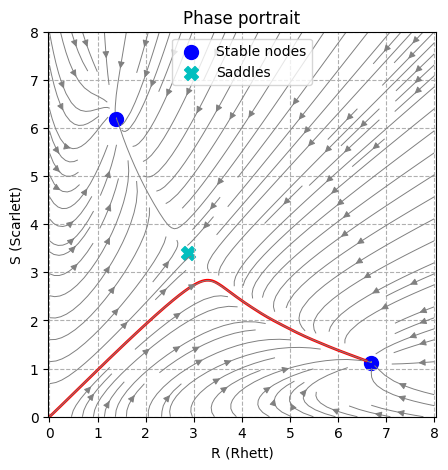

In [10]:
def F(z):
    R, S = z
    return [-R + A_S + k*S*np.exp(-S),
            -S + A_R + k*R*np.exp(-R)]

def Jacobian(R, S):
    return np.array([[-1, k*np.exp(-S)*(1 - S)],
                     [k*np.exp(-R)*(1 - R), -1]])

def love(t, z):
    return F(z)

A_R = 1.0
A_S = 1.2
k = 15
    
guesses = [(i, j) for i in np.linspace(0, 6, 6)
                  for j in np.linspace(0, 6, 6)]

eq_pts = []

for g in guesses:
    sol = fsolve(F, g, maxfev=2000)
    if np.all(sol >= 0):
        if not any(np.allclose(sol, p, atol=1e-3) for p in eq_pts):
            eq_pts.append(sol)

eq_pts = np.array(eq_pts)

stable_pts = []
saddle_pts = []

for R0, S0 in eq_pts:
    eigs = eigvals(Jacobian(R0, S0))
    if np.all(np.real(eigs) < 0):
        stable_pts.append([R0, S0])
    elif np.any(np.real(eigs) > 0) and np.any(np.real(eigs) < 0):
        saddle_pts.append([R0, S0])

stable_pts = np.array(stable_pts)
saddle_pts = np.array(saddle_pts)

# Phase field
r = np.linspace(0, 8, 101)
s = np.linspace(0, 8, 101)
Rr, Ss = np.meshgrid(r, s)
dR = -Rr + A_S + k*Ss*np.exp(-Ss)
dS = -Ss + A_R + k*Rr*np.exp(-Rr)

t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)
z0 = [0, 0]   # indifferent at meeting

sol = solve_ivp(love, t_span, z0, t_eval=t_eval)
R, S = sol.y
plt.figure(figsize=(5,5))
plt.plot(R, S, 'r', lw=2)

# Phase portrait
plt.streamplot(Rr, Ss, dR, dS, density=1.2, color="gray", linewidth=0.7, arrowsize=1)

if len(stable_pts)>0:
    plt.scatter(stable_pts[:,0], stable_pts[:,1], c='blue', s=100, label="Stable nodes")
if len(saddle_pts)>0:
    plt.scatter(saddle_pts[:,0], saddle_pts[:,1], c='c', s=100, marker='X', label="Saddles")

plt.xlabel('R (Rhett)')
plt.ylabel('S (Scarlett)')
plt.title('Phase portrait')
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--')
plt.show()

### Reference : 

1. Strogatz, S. H. (1988). *Love affairs and differential equations*. Math. Magazine 61, 35.

2. Rinaldi, S., Della Rossa, F., and Landi, P. (2013). *A mathematical model of ‘‘Gone with the Wind.’’* Physica A 392, 3231.